# This file is used to run some basic checks

Based on "02-Experiment-Clean-Data.csv"


In [1]:
# datafolder = "C:\\Users\\xinxi\\Purdue\\EffectiveSocialLearningProject\\DataAnalysis\\RawData\\Session_Formal"
datafolder = "..\\RawData\\Session_Formal"
datafolder2 = "..\\ImportedData\\"
outputfolder = "..\\Output_Figures\\" 

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import copy
import os
import random
import math as math
import matplotlib.pylab as plt #Typically matplotlib.pylab is imported as plt (shortened name)
import pdb
from scipy.optimize import minimize
import shutil
import csv
from MyLatexFunctions_SocialLearning import * 
from itertools import permutations 
from itertools import combinations
import csv
import matplotlib.pyplot as plt

from scipy import stats
import networkx as nx

# Content

- [Network Information](#Network-Information)
- [Data Import](#Data-Import)
- [Waiting turns](#Waiting-turns)
    - [

# Network Information 


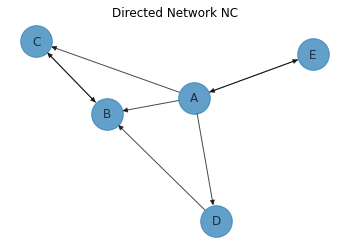

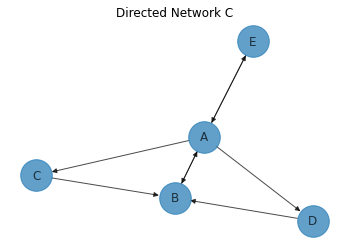

In [3]:

# ------- DIRECTED
 
# Build a dataframe with your connections
# This time a pair can appear 2 times, in one side or in the other!
network_NC = pd.DataFrame({ 'from':['A', 'A', 'A', 'A', 'B', 'C', 'D', 'E'],
                           'to':['B', 'C', 'D', 'E', 'C', 'B', 'B', 'A']})
network_C  = pd.DataFrame({ 'from':['A', 'A', 'A', 'A', 'B', 'C', 'D', 'E'],
                           'to':['B', 'C', 'D', 'E', 'A', 'B', 'B', 'A']})
 
# Build your graph. Note that we use the DiGraph function to create the graph!
G_NC =nx.from_pandas_edgelist(network_NC, 'from', 'to', create_using=nx.DiGraph() )
G_C =nx.from_pandas_edgelist(network_C, 'from', 'to', create_using=nx.DiGraph() )
 
# Make the graph

plt.title("Directed Network NC")
nx.draw(G_NC, with_labels=True,  node_size=1000, alpha=0.7, arrows=True) 
plt.show()

plt.title("Directed Network C")
nx.draw(G_C, with_labels=True,  node_size=1000, alpha=0.7, arrows=True) 
plt.show()


In [4]:
# No longer remember what I wanted to do 

### Show characteristics
NetworkCharacteristics = pd.DataFrame()


# Failed attempt
# def AbstractCharacteristics(network, charact_command,  network_name, charac_name):
#     exec("dict=" + network+"."+charact_command)
#     NC_characteristics = pd.DataFrame.from_dict(dict)
#     columns=['.player.type','In-degree']
#     NC_characteristics['network'] = network_name
#     NC_characteristics = NC_characteristics.rename(columns={0: '.player.type', 1:charac_name})
#     return NC_characteristics
# NetworkCharacteristics = NetworkCharacteristics.append(AbstractCharacteristics("G_NC", "in_degree", 'nc', 'In-degree'))
# NetworkCharacteristics = NetworkCharacteristics.append(AbstractCharacteristics("G_C", "in_degree", 'c', 'In-degree'))


# Indegree
NC_characteristics = pd.DataFrame.from_dict(G_NC.in_degree)
# columns=['.player.type','In-degree']
NC_characteristics['network'] = 'nc'
NC_characteristics = NC_characteristics.rename(columns={0: '.player.type', 1:'In-degree'})
NetworkCharacteristics = NC_characteristics

NC_characteristics = pd.DataFrame.from_dict(G_C.in_degree)
NC_characteristics['network'] = 'c'
NC_characteristics = NC_characteristics.rename(columns={0: '.player.type', 1:'In-degree'})
NetworkCharacteristics = NetworkCharacteristics.append(NC_characteristics, ignore_index=True)

# Outdegree 
NC_characteristics = pd.DataFrame.from_dict(G_NC.out_degree)
NC_characteristics['network'] = 'nc'
NC_characteristics = NC_characteristics.rename(columns={0: '.player.type', 1:'Out-degree'})
morecolumns = NC_characteristics

NC_characteristics = pd.DataFrame.from_dict(G_C.out_degree)
NC_characteristics['network'] = 'c'
NC_characteristics = NC_characteristics.rename(columns={0: '.player.type', 1:'Out-degree'})
morecolumns = morecolumns.append(NC_characteristics, ignore_index=True)


#Merge together:
NetworkCharacteristics = NetworkCharacteristics.merge(morecolumns, on=['network', '.player.type'])
NetworkCharacteristics['.player.type'] = NetworkCharacteristics['.player.type'].str.lower()

In [5]:
NetworkCharacteristics

,.player.type,In-degree,network,Out-degree
0,a,1,nc,4
1,b,3,nc,1
2,c,2,nc,1
3,d,1,nc,1
4,e,1,nc,1
5,a,2,c,4
6,b,3,c,1
7,c,1,c,1
8,d,1,c,1
9,e,1,c,1


# Data Import


[Back](#Content)

In [6]:
# Import data

data  = pd.read_csv("02-Experiment-Clean-Data.csv")

for col in data.columns:
    if type(data[col].unique()[1]) == str:
        data[col] = data[col].str.lower()

        
# Add network characteristics
data = data.merge(NetworkCharacteristics, on=['network','.player.type' ], how='left')


# Change the rounds into matches  
data.loc[data['app_name']=='pdcn', 'match'] = data['.subsession.round_number']
condition = data['app_name']=='dcn'
data.loc[condition, 'match'] = ((data.loc[condition, '.subsession.round_number'] -1)/ 3).astype(int) +1 
condition = (data['app_name']=='dcn') & (data['date']=='03/19/2021')
data.loc[condition, 'match'] = ((data.loc[condition, '.subsession.round_number'] -1)/ 4).astype(int) +1 
# data['match'] = data['.subsession.round_number']
data[['match', 'app_name', '.subsession.round_number']]


,match,app_name,.subsession.round_number
0,1.0,pdcn,1.0
1,2.0,pdcn,2.0
2,3.0,pdcn,3.0
3,4.0,pdcn,4.0
4,5.0,pdcn,5.0
...,...,...,...
5295,9.0,dcn,26.0
5296,9.0,dcn,27.0
5297,10.0,dcn,28.0
5298,10.0,dcn,29.0


In [7]:
#Additional data
add_data  = pd.read_csv(datafolder2+"DataAnalysis_v4_EmpiricalOptimalDecisionTurn.csv")
add_data['app_name'] = 'dcn'
add_data = add_data.drop(columns=['waiting_cost'])
data = data.merge(add_data, left_on=['app_name', 'participant.code','match', '.subsession.round_number' ],
           right_on=['app_name', 'pcode', 'g_match', 'round_id'])

# Related to empirically optimal decision turn
data['Empirically optimal'] = ''
data.loc[data['.player.decision_period']==data['optimal_turn_empirical']  ,'Empirically optimal']='Optimal'
data.loc[data['.player.decision_period']<data['optimal_turn_empirical']  ,'Empirically optimal']='Early'
data.loc[data['.player.decision_period']>data['optimal_turn_empirical']  ,'Empirically optimal']='Late'
## for cost that is high, also note that the optimal decision turn can't exceed 1
data['Empirically optimal (with cost)'] = ''

data['optimal_turn_empirical (with cost)'] = data['optimal_turn_empirical']
data.loc[(data['waiting_cost']=='h') & (data['optimal_turn_empirical']>1), 'optimal_turn_empirical (with cost)'] = 1
data.loc[(data['waiting_cost']=='h') & (data['optimal_turn_empirical']>=1) & (data['In-degree']==1), 'optimal_turn_empirical (with cost)'] = 0
data.loc[data['.player.decision_period']==data['optimal_turn_empirical (with cost)']  ,'Empirically optimal (with cost)']='Optimal'
data.loc[data['.player.decision_period']<data['optimal_turn_empirical (with cost)']  ,'Empirically optimal (with cost)']='Early'
data.loc[data['.player.decision_period']>data['optimal_turn_empirical (with cost)']  ,'Empirically optimal (with cost)']='Late'

In [8]:
# String length used to measure how many signals gathered in the end
data['signal_gathered'] = data['.player.information_set_currentperiod'].str.len()
data.loc[data['app_name']=='pdcn', 'signal_gathered'] = data['signal_gathered']/2

# Correctness
data['correctness'] = 1 * (data['.player.choice_of_urn']==data['.group.storyline'])
data.loc[data['app_name']=='pdcn', 'correctness'] = 1 * (data['.player.choice_of_urn']==data['.subsession.storyline'])

# Payoff
data['waiting_cost_value'] = 1
data.loc[data['waiting_cost']=='h', 'waiting_cost_value'] = 8
data['payoff'] = 40+ 100*data['correctness'] - data['.player.decision_period'] * data['waiting_cost_value']

# Welfare Improvement
data['WrongBall'] = 1*((data['.player.current_ball']!=data['.group.storyline']) 
                                   & (data['app_name']!='pdcn'))
data['WrongBallCorrectGuess'] = np.nan
data.loc[(data['WrongBall']==1) &  (data['app_name']=='dcn') , 'WrongBallCorrectGuess'] = data['correctness']
data['CorrectBallCorrectGuess'] = np.nan
data.loc[(data['WrongBall']==0) &  (data['app_name']=='dcn') , 'CorrectBallCorrectGuess'] = data['correctness']

In [9]:
data.columns

Index(['participant.code', 'session.code', 'network', 'waiting_cost', 'date_x',
       'app_name', '.player.current_ball', '.player.type', '.player.period',
       '.player.choice_of_urn',
       ...
       'optimal_turn_empirical', 'Empirically optimal',
       'Empirically optimal (with cost)', 'optimal_turn_empirical (with cost)',
       'signal_gathered', 'correctness', 'waiting_cost_value', 'WrongBall',
       'WrongBallCorrectGuess', 'CorrectBallCorrectGuess'],
      dtype='object', length=114)

In [10]:
def getCoopBoot(rows):

    n = len(rows)
    
    nBoot = 1000
    st = np.zeros(nBoot)
    
    for i in range(nBoot):
        rs = np.random.choice(rows,n)
        st[i]= np.mean(rs)
    
#     return  [st.std(),np.percentile(st,2.5),np.percentile(st,97.5)]
    return  [st.std(),np.percentile(st,5),np.percentile(st,95)]


def bootstrap_sterr(data, n_samples, stat):
    
    n = len(data)                                #get length of the data
    ix = np.random.randint(0, n, (n_samples, n)) #get an array of bootsrapped indices
    samples = data[ix]                           #create bootrapped samples
    sterr = np.std(stat(samples, axis=1))        #calculate standard deviation of the sampling distribution of 'stat'
    
    return sterr

# Waiting turns
- [By Match](#Waiting-by-match)
    - [Graph for other variables by match](#Other-variables-by-match)
    - [Table for waiting turns by match](#Tables-for-waiting-turns-by-match)
    
- [By Individuals](#Waiting-by-individuals)
- [By Nodes](#Waiting-by-nodes)







[Back](#Content)

## By Match

## Waiting by match

In [11]:


# Group average with std
def dataByMatch(data):
    dataGroupAverage= data.groupby(by=['app_name', 'network', 'waiting_cost','match', 
                                       'session.code','.subsession.round_number',
                                       '.group.id_in_subsession'])['.player.decision_period'].mean().reset_index()
    df = pd.DataFrame(dataGroupAverage)
    dataByMatch = df.groupby(by=['app_name', 'network', 'waiting_cost','match']).agg({'.player.decision_period': ['mean', 'std']})
    dataByMatch.columns = ['mean', 'std']
    dataByMatch = dataByMatch.reset_index()

    dataByMatch['std_boot'] = 0
    dataByMatch['upper_boot'] = 0
    dataByMatch['lower_boot'] = 0
    for network in df['network'].unique():
        for cost in df['waiting_cost'].unique():
            for match_num in df['match'].unique():
                condition =  (df['network']==network) & (df['waiting_cost']==cost) & (df['match']==match_num)
                temp = df.loc[condition]
                x = temp['.player.decision_period']
                condition_2 =  (dataByMatch['network']==network) & (dataByMatch['waiting_cost']==cost) & (dataByMatch['match']==match_num)
                dataByMatch.loc[condition_2,'std_boot'] = getCoopBoot(x)[0]
                dataByMatch.loc[condition_2,'upper_boot'] = getCoopBoot(x)[1]
                dataByMatch.loc[condition_2,'lower_boot'] = getCoopBoot(x)[2]
    return dataByMatch




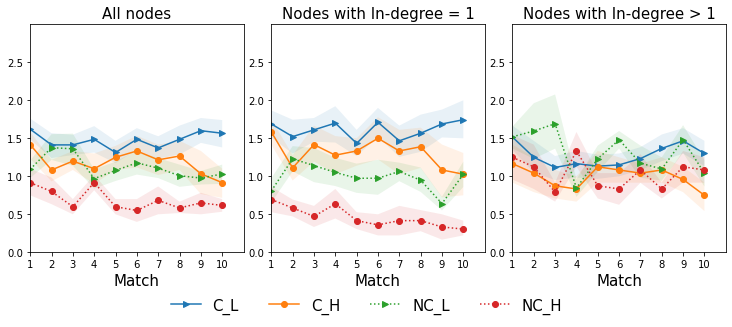

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3,  sharex=True,   constrained_layout=True, figsize=(10,4))
fig.set_constrained_layout_pads( w_pad=1 / 100)

linestyle = {'c':'-', 'nc':':'}
markerstyle = {'l': '>', 'h': 'o' }

# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (1, 11)
custom_ylim = (0, 3)
custom_xtick = np.arange(1,11,step=1)
custom_ytick = np.arange(0,3,step=0.5)
# custom_xticklabel = [1,5,10]

plt.setp(axes, xticks=custom_xtick, yticks= custom_ytick,xlim=custom_xlim, ylim=custom_ylim)
#  xticklabels=custom_xticklabel, 

def drawSubFigure(data, i, sub_title ):
    for nt in ['c', 'nc']:
        for c in ['l','h']:
            x = data.loc[(data['network']==nt) & (data['waiting_cost']==c )]
            axes[i].plot(x['match'], x['mean'], label=nt.upper()+'_'+c.upper(), linestyle=linestyle[nt], marker=markerstyle[c])
            axes[i].fill_between(x['match'], x['upper_boot'],x['lower_boot'],alpha=0.1,)
            axes[i].set_title(sub_title, fontsize=15) 
            axes[i].set_xlabel('Match', fontsize=15)

drawSubFigure(dataByMatch(data),0, "All nodes")
drawSubFigure(dataByMatch(data[data['In-degree']==1]),1, "Nodes with In-degree = 1")
drawSubFigure(dataByMatch(data[data['In-degree']>1]),2, "Nodes with In-degree > 1")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(.5,-0.05), loc="center" , ncol=4, frameon=False, prop={'size':15})
fig.savefig(outputfolder+"03-Experiment-Analysis-Summary-Statistics-Waiting-Group"  , bbox_inches="tight")  

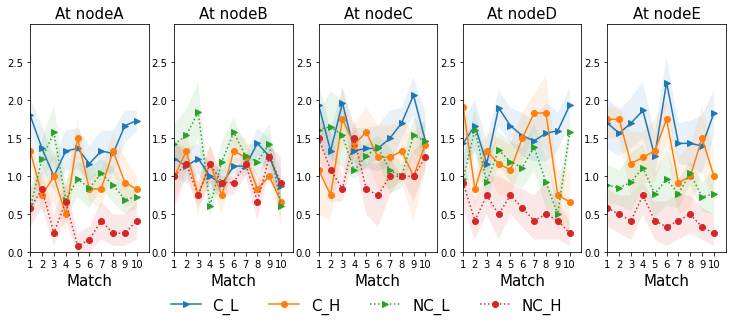

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=5,  sharex=True,   constrained_layout=True, figsize=(10,4))
fig.set_constrained_layout_pads( w_pad=1 / 100)

linestyle = {'c':'-', 'nc':':'}
markerstyle = {'l': '>', 'h': 'o' }

# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (1, 11)
custom_ylim = (0, 3)
custom_xtick = np.arange(1,11,step=1)
custom_ytick = np.arange(0,3,step=0.5)
# custom_xticklabel = [1,5,10]

plt.setp(axes, xticks=custom_xtick, yticks= custom_ytick,xlim=custom_xlim, ylim=custom_ylim)
#  xticklabels=custom_xticklabel, 

def drawSubFigure(data, i, sub_title ):
    for nt in ['c', 'nc']:
        for c in ['l','h']:
            x = data.loc[(data['network']==nt) & (data['waiting_cost']==c )]
            axes[i].plot(x['match'], x['mean'], label=nt.upper()+'_'+c.upper(), linestyle=linestyle[nt], marker=markerstyle[c])
            axes[i].fill_between(x['match'], x['upper_boot'],x['lower_boot'],alpha=0.1,)
            axes[i].set_title(sub_title, fontsize=15) 
            axes[i].set_xlabel('Match', fontsize=15)

            
for i,pos in enumerate(['a', 'b','c','d','e']):
    drawSubFigure(dataByMatch(data[data['.player.type']==pos]),i, "At node"+pos.upper())


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(.5,-0.05), loc="center" , ncol=5, frameon=False, prop={'size':15})
fig.savefig(outputfolder+"03-Experiment-Analysis-Summary-Statistics-Waiting-Group-by-Nodes"  , bbox_inches="tight")  

## Other variables by match


[Back](#Waiting-turns)

In [13]:
def GraphsByMatch(var, y_max, y_step):
    def dataByMatch(data):
        dataGroupAverage= data.groupby(by=['app_name', 'network', 'waiting_cost','match', 
                                           'session.code','.subsession.round_number','.group.id_in_subsession'])[var].mean().reset_index()
        df = pd.DataFrame(dataGroupAverage)
        df = df[df['app_name']=='dcn']
        dataByMatch = df.groupby(by=['app_name', 'network', 'waiting_cost','match']).agg({var: ['mean', 'std']})
        dataByMatch.columns = ['mean', 'std']
        dataByMatch = dataByMatch.reset_index()

        dataByMatch['std_boot'] = 0
        dataByMatch['upper_boot'] = 0
        dataByMatch['lower_boot'] = 0
        for network in df['network'].unique():
            for cost in df['waiting_cost'].unique():
                for match_num in df['match'].unique():
                    condition =  (df['network']==network) & (df['waiting_cost']==cost) & (df['match']==match_num)
                    temp = df.loc[condition]
                    x = temp[var]
                    condition_2 =  (dataByMatch['network']==network) & (dataByMatch['waiting_cost']==cost) & (dataByMatch['match']==match_num)
                    dataByMatch.loc[condition_2,'std_boot'] = getCoopBoot(x)[0]
                    dataByMatch.loc[condition_2,'upper_boot'] = getCoopBoot(x)[1]
                    dataByMatch.loc[condition_2,'lower_boot'] = getCoopBoot(x)[2]
        return dataByMatch

    ################## Graphs 
    fig, axes = plt.subplots(nrows=1, ncols=3,  sharex=True,   constrained_layout=True, figsize=(10,4))
    fig.set_constrained_layout_pads( w_pad=1 / 100)

    linestyle = {'c':'-', 'nc':':'}
    markerstyle = {'l': '>', 'h': 'o' }

    # Defining custom 'xlim' and 'ylim' values.
    custom_xlim = (1, 11)
    custom_ylim = (0, y_max)
    custom_xtick = np.arange(1,11,step=1)
    custom_ytick = np.arange(0,y_max,step=y_step)
    # custom_xticklabel = [1,5,10]

    plt.setp(axes, xticks=custom_xtick, yticks= custom_ytick,xlim=custom_xlim, ylim=custom_ylim)
    #  xticklabels=custom_xticklabel, 

    def drawSubFigure(data, i, sub_title ):
        for nt in ['c', 'nc']:
            for c in ['l','h']:
                x = data.loc[(data['network']==nt) & (data['waiting_cost']==c )]
                axes[i].plot(x['match'], x['mean'], label=nt.upper()+'_'+c.upper(), 
                             linestyle=linestyle[nt], marker=markerstyle[c])
                axes[i].fill_between(x['match'], x['upper_boot'],x['lower_boot'],alpha=0.1,)
                axes[i].set_title(sub_title, fontsize=15) 
                axes[i].set_xlabel('Match', fontsize=15)

    drawSubFigure(dataByMatch(data),0, "All nodes")
    drawSubFigure(dataByMatch(data[data['In-degree']==1]),1, "Nodes with In-degree = 1")
    drawSubFigure(dataByMatch(data[data['In-degree']>1]),2, "Nodes with In-degree > 1")

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(.5,-0.05), loc="center" , ncol=4, frameon=False, prop={'size':15})
    fig.savefig(outputfolder+"03-Experiment-Analysis-Summary-Statistics-Group"+main_outcomes[var]  , bbox_inches="tight")  


    ############
    fig, axes = plt.subplots(nrows=1, ncols=5,  sharex=True,   constrained_layout=True, figsize=(10,4))
    fig.set_constrained_layout_pads( w_pad=1 / 100)

    plt.setp(axes, xticks=custom_xtick, yticks= custom_ytick,xlim=custom_xlim, ylim=custom_ylim)
    #  xticklabels=custom_xticklabel, 

    for i,pos in enumerate(['a', 'b','c','d','e']):
        drawSubFigure(dataByMatch(data[data['.player.type']==pos]),i, "At node"+pos.upper())


    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(.5,-0.05), loc="center" , ncol=5, frameon=False, prop={'size':15})
    fig.savefig(outputfolder+"03-Experiment-Analysis-Summary-Statistics-Group-by-Nodes"+main_outcomes[var]  , bbox_inches="tight")  

In [14]:
main_outcomes = {'.player.decision_period': 'waiting', #1,0.5
                'signal_gathered': 'signal_transmitted', #6,1
                'correctness': 'correctness',
                'payoff': 'payoffs',
                'WrongBallCorrectGuess':  'correctMistake'     }


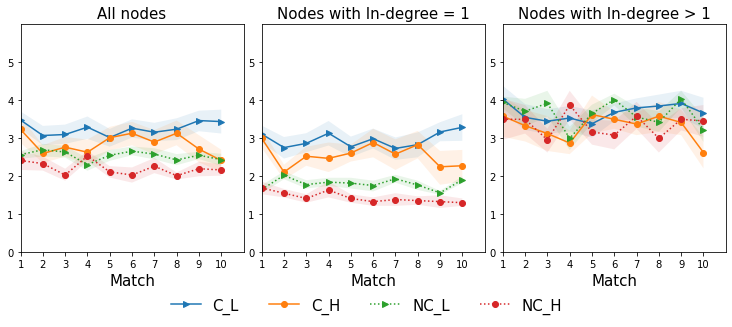

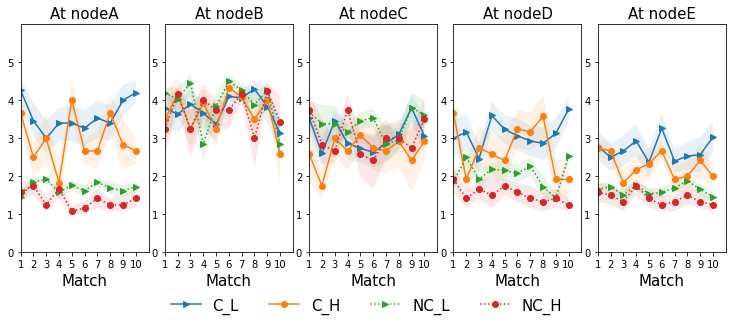

In [162]:
GraphsByMatch('signal_gathered',6,1)

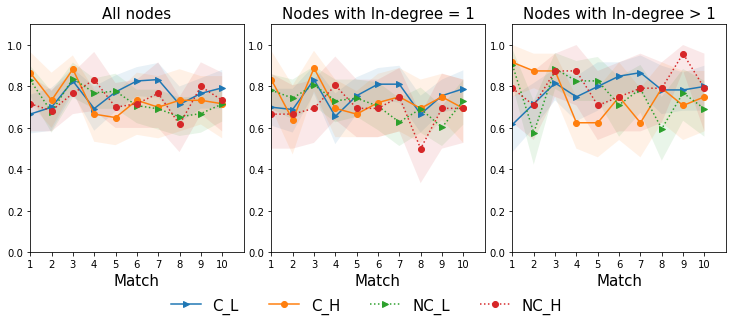

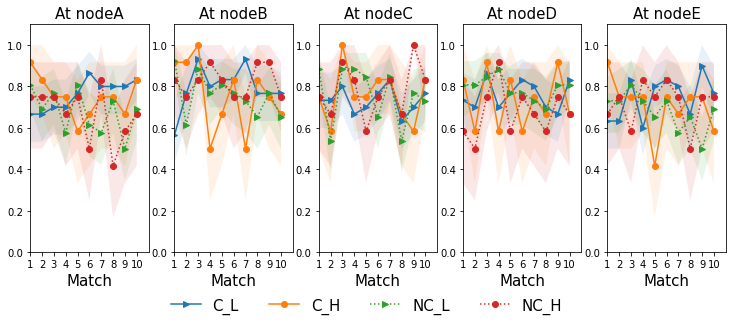

In [163]:
GraphsByMatch('correctness',1.1,.2)

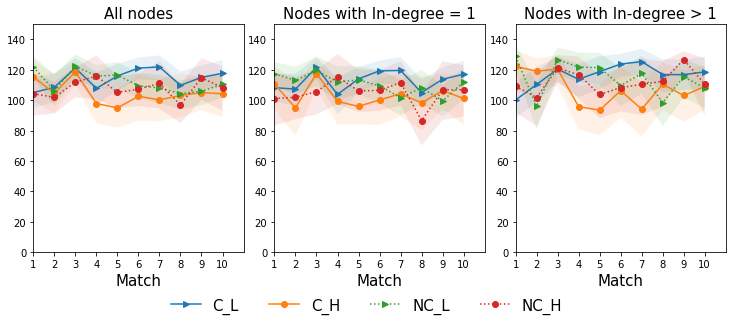

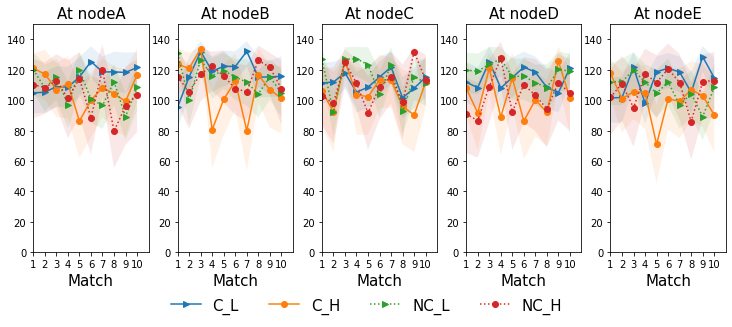

In [164]:
GraphsByMatch('payoff',150,20)

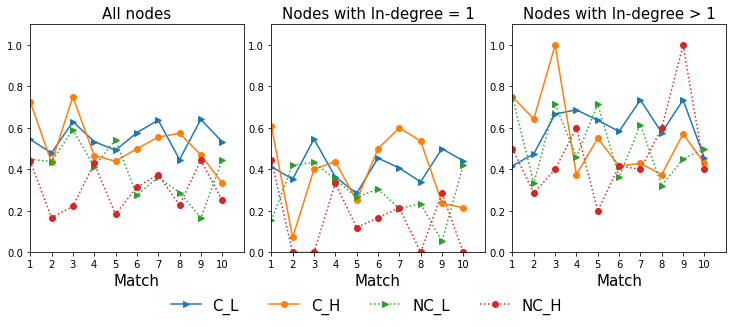

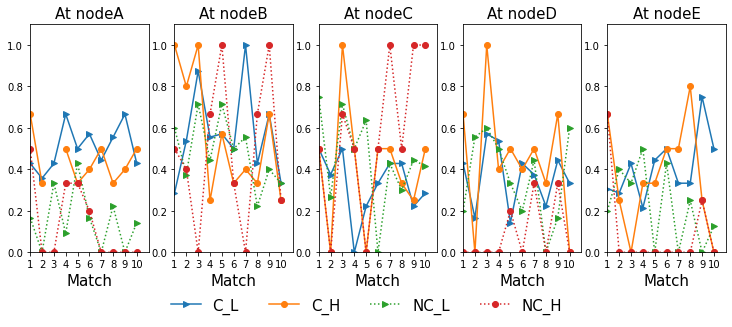

In [165]:

GraphsByMatch('WrongBallCorrectGuess',1.1,.2)

## Tables for waiting turns by match


Note: s.e. (I can use bootstraping standard deviation too)

[Back](#Waiting-turns)

In [14]:
def SummaryTableByTreatment(data, var, varname):
    # Group average with std
    def dataByTreatment_Table(data):
        # note: '.group.id_in_subsession' excludes pdcn 
        dataGroupAverage= data.groupby(by=['app_name', 'network', 'waiting_cost','match', 
                                       'session.code','.subsession.round_number',
                                       '.group.id_in_subsession'])[var].mean().reset_index()
        df = pd.DataFrame(dataGroupAverage)
        dataByMatch = df.groupby(by=['app_name', 'network',
                                     'waiting_cost']).agg({var: ['mean', 'std','count']})
        dataByMatch.columns = ['mean', 'std','n']
        dataByMatch['s.e.'] = dataByMatch['std'] / np.sqrt(dataByMatch['n'])
        dataByMatch = dataByMatch.reset_index()


        # # Bootstrapping result (should not vary too much compared to s.e.)
        # dataByMatch['std_boot'] = 0
        # dataByMatch['upper_boot'] = 0
        # dataByMatch['lower_boot'] = 0
        # for network in df['network'].unique():
        #     for cost in df['waiting_cost'].unique():
        #             condition =  (df['network']==network) & (df['waiting_cost']==cost) 
        #             temp = df.loc[condition]
        #             x = temp['.player.decision_period']
        #             condition_2 =  (dataByMatch['network']==network) & (dataByMatch['waiting_cost']==cost) 
        #             dataByMatch.loc[condition_2,'std_boot'] = getCoopBoot(x)[0]
        #             dataByMatch.loc[condition_2,'upper_boot'] = getCoopBoot(x)[1]
        #             dataByMatch.loc[condition_2,'lower_boot'] = getCoopBoot(x)[2]

        kk = dataByMatch[['network', 'waiting_cost', 'mean', 's.e.' ]].round(2)
        return kk.set_index(['network', 'waiting_cost']).stack()

    # The first table is for all match 1-10 ( can change to only latter matches so on)
    Table = dataByTreatment_Table(data).to_frame()

    Table = Table.merge(dataByTreatment_Table(data[data['In-degree']==1]).to_frame(), left_index=True, right_index=True)
    Table = Table.merge(dataByTreatment_Table(data[data['In-degree']>1]).to_frame(), left_index=True, right_index=True)
    Table.columns = ['All nodes', 'In-degree=1', 'In-degree>1']
    summary_table = pd.DataFrame()
    for index,row in Table.iterrows():
    #     print(index)
        for idx in row.index:
            if 'mean' in index:
                row[idx] = row[idx]
            else :
    #             row[idx] = row[idx].round(1)
                row[idx] = '(' + str(round(row[idx],2)) + ')'

        summary_table = summary_table.append(row)
    summary_table.index =  pd.MultiIndex.from_tuples(summary_table.index)
    summary_table = summary_table.reset_index()
    def clean_columns(row):
        if 's.e.' in row['level_2']:
            row['level_0'] = ''
            row['level_1'] = ''
        return row
    summary_table= summary_table.apply(clean_columns, axis=1)
    
    summary_table = summary_table.drop(columns='level_2')
    summary_table.rename(columns={"level_0":'',"level_1":''}, inplace = True)  

#     varname = 'waiting_turns'
    out_text = summary_table.to_latex(column_format="ccccc", multicolumn_format='c', index=False)
    print(out_text)
    file_name = '03-Experiment-Analysis-Summary-Statistics-Table-'+varname
    tex_file_name=file_name+".tex"
    f = open(outputfolder+tex_file_name, 'w')
    f.write(out_text)
    f.close()
    

In [15]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")


def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [16]:
network1='c'
waitingcost1='l'
var = '.player.decision_period'
condition1 = (dataGroupAverage['app_name']=='dcn') & (dataGroupAverage['network']==network1) & (dataGroupAverage['waiting_cost']==waitingcost1)

pop_a = dataGroupAverage.loc[condition1, var]


NameError: name 'dataGroupAverage' is not defined

In [ ]:
def ComparingAverageRate(data,var, network1,waitingcost1, network2,  waitingcost2, prediction_a):
    dataGroupAverage= data.groupby(by=['app_name', 'network', 'waiting_cost','match', 
                                   'session.code','.subsession.round_number',
                                   '.group.id_in_subsession'])[var].mean().reset_index()
    condition1 = (dataGroupAverage['app_name']=='dcn') & (dataGroupAverage['network']==network1) & (dataGroupAverage['waiting_cost']==waitingcost1)
    condition2 = (dataGroupAverage['app_name']=='dcn') & (dataGroupAverage['network']==network2) & (dataGroupAverage['waiting_cost']==waitingcost2)

    pop_a = dataGroupAverage.loc[condition1, var]
    pop_b = dataGroupAverage.loc[condition2, var]
        
    pop_a = pop_a[~np.isnan(pop_a)]
    pop_b = pop_b[~np.isnan(pop_b)]

    original_statistics = pop_a.mean() - pop_b.mean()
    print(original_statistics)

    print('#1. use T-test')
    print('Check pop_a normality')
    check_normality(pop_a-pop_a.mean())
    print('Check pop_b normality')
    check_normality(pop_a-pop_a.mean())
    print('Check variance homogeneity')
    check_variance_homogeneity(pop_a, pop_b)

    print(stats.ttest_ind(a=pop_a,b=pop_b,equal_var=False))

    print('# 2. use permutation test (non-parametric test)' )
    n1 = len(pop_a)
    n2 = len(pop_b)
    sim_num = 10000
    
    combined = np.append(pop_a, pop_b)
    n = len(combined)
    idx = np.arange(n)
    sim_d = []
    for i in range(sim_num):
        np.random.shuffle(idx)
        d = np.mean(combined[idx][0:n1]) - np.mean(combined[idx][n1::])
    #     print(d)
        sim_d.append(d)
    # calculate the p-value for two-sided test:
    count = (np.abs(sim_d)>=np.abs(original_statistics)).sum()
#     print(count)
    p_val = np.round((count+1)/(sim_num+1), 3)
    print(p_val)
    
    print('# 2b. use  test (non-parametric test)')
    print(stats.ranksums(pop_a,pop_b))

    print('#3. use use permutation test (non-parametric test) test equilibrium prediction')
    n3 = len(pop_a)
    pop_c = prediction_a*np.ones(n3)
    original_statistics = pop_a.mean() - pop_c.mean()
    sim_num = 10000
    
    combined = np.append(pop_a, pop_c)
    n = len(combined)
    idx = np.arange(n)
    sim_d = []
    for i in range(sim_num):
        np.random.shuffle(idx)
        d = np.mean(combined[idx][0:n1]) - np.mean(combined[idx][n1::])
    #     print(d)
        sim_d.append(d)
    # calculate the p-value for two-sided test:
    count = (np.abs(sim_d)>=np.abs(original_statistics)).sum()
#     print(count)
    p_val = np.round((count+1)/(sim_num+1), 3)
    print(p_val)
    
    

#### Examples

SummaryTableByTreatment(data, '.player.decision_period', 'waiting')

ComparingAverageRate(data, '.player.decision_period', 'c','h','c','l')

main_outcomes = {'.player.decision_period': 'waiting', #1,0.5
                'signal_gathered': 'signal_transmitted', #6,1
                'correctness': 'correctness',
                'payoff': 'payoffs',
                'WrongBallCorrectGuess':  'correctMistake'     }

In [56]:
main_outcomes = {'.player.decision_period': 'waiting', #1,0.5
                'signal_gathered': 'signal_transmitted', #6,1
                'correctness': 'correctness',
                'payoff': 'payoffs',
                'WrongBallCorrectGuess':  'correctWrongBall',
                'CorrectBallCorrectGuess': 'correctRightBall'}


for key in main_outcomes.keys():
    print(main_outcomes[key])
    SummaryTableByTreatment(data, key, main_outcomes[key])

waiting
\begin{tabular}{ccccc}
\toprule
   & All nodes & In-degree=1 & In-degree>1 \\
\midrule
 c & h &      1.18 &        1.31 &         1.0 \\
   &   &    (0.04) &      (0.05) &      (0.04) \\
 c & l &      1.48 &        1.61 &        1.27 \\
   &   &    (0.03) &      (0.04) &      (0.03) \\
nc & h &      0.69 &        0.46 &        1.03 \\
   &   &    (0.03) &      (0.03) &      (0.04) \\
nc & l &      1.12 &        0.99 &        1.32 \\
   &   &    (0.03) &      (0.03) &      (0.05) \\
\bottomrule
\end{tabular}

signal_transmitted
\begin{tabular}{ccccc}
\toprule
   & All nodes & In-degree=1 & In-degree>1 \\
\midrule
 c & h &      2.86 &        2.56 &         3.3 \\
   &   &    (0.06) &      (0.07) &      (0.08) \\
 c & l &      3.25 &        2.97 &        3.69 \\
   &   &    (0.05) &      (0.06) &      (0.06) \\
nc & h &      2.21 &        1.44 &        3.36 \\
   &   &    (0.04) &      (0.03) &      (0.08) \\
nc & l &      2.54 &        1.81 &        3.65 \\
   &   &    (0.03) &  

In [73]:
for key in main_outcomes.keys():
    print(main_outcomes[key])
    SummaryTableByTreatment(data[data['match']>5], key, main_outcomes[key])

waiting
\begin{tabular}{ccccc}
\toprule
   & All nodes & In-degree=1 & In-degree>1 \\
\midrule
 c & h &      1.15 &        1.27 &        0.98 \\
   &   &    (0.06) &      (0.09) &      (0.05) \\
 c & l &       1.5 &        1.64 &         1.3 \\
   &   &    (0.05) &      (0.06) &      (0.05) \\
nc & h &      0.62 &        0.37 &        0.99 \\
   &   &    (0.04) &      (0.04) &      (0.05) \\
nc & l &      1.06 &        0.93 &        1.25 \\
   &   &    (0.04) &      (0.05) &      (0.05) \\
\bottomrule
\end{tabular}

signal_transmitted
\begin{tabular}{ccccc}
\toprule
   & All nodes & In-degree=1 & In-degree>1 \\
\midrule
 c & h &      2.86 &        2.57 &         3.3 \\
   &   &     (0.1) &      (0.12) &       (0.1) \\
 c & l &      3.31 &         3.0 &        3.78 \\
   &   &    (0.08) &      (0.08) &      (0.09) \\
nc & h &      2.14 &        1.34 &        3.32 \\
   &   &    (0.05) &      (0.04) &       (0.1) \\
nc & l &      2.53 &        1.79 &        3.65 \\
   &   &    (0.04) &  

In [72]:
data.columns

Index(['participant.code', 'session.code', 'network', 'waiting_cost', 'date',
       'app_name', '.player.current_ball', '.player.type', '.player.period',
       '.player.choice_of_urn', '.player.decision_period',
       '.player.information_set_lastperiod',
       '.player.information_set_currentperiod', '.player.history',
       '.player.time_on_page', '.subsession.round_number',
       '.player.robot_signal', '.player.robot_type', '.player.robot_period',
       '.player.robot_guess', '.subsession.storyline', '.player.sec_spent',
       '.group.storyline', '.subsession.groupnumber',
       '.group.id_in_subsession', 'In-degree', 'Out-degree', 'match',
       'signal_gathered', 'correctness', 'waiting_cost_value', 'payoff',
       'WrongBall', 'WrongBallCorrectGuess', 'CorrectBallCorrectGuess'],
      dtype='object')

In [53]:
data[['WrongBallCorrectGuess']].mean()

WrongBallCorrectGuess    0.374579
dtype: float64

In [55]:
data[['CorrectBallCorrectGuess']].mean()

CorrectBallCorrectGuess    0.900427
dtype: float64

In [57]:
data.loc[data['CorrectBallCorrectGuess']==0, ['.group.storyline','.player.current_ball', '.player.choice_of_urn', '.player.information_set_currentperiod', '.subsession.groupnumber']]

,.group.storyline,.player.current_ball,.player.choice_of_urn,.player.information_set_currentperiod,.subsession.groupnumber
1310,red,red,blue,ea,3.0
1321,red,red,blue,ea,6.0
1323,red,red,blue,ea,6.0
1324,red,red,blue,bacd,7.0
1325,red,red,blue,bacd,7.0
...,...,...,...,...,...
5249,red,red,blue,daeb,4.0
5254,blue,blue,red,aeb,5.0
5264,blue,blue,red,caeb,9.0
5272,blue,blue,red,daeb,1.0


In [59]:
data.loc[data['WrongBallCorrectGuess']==1, ['.group.storyline','.player.current_ball', '.player.choice_of_urn', '.player.information_set_currentperiod', '.subsession.groupnumber']]

,.group.storyline,.player.current_ball,.player.choice_of_urn,.player.information_set_currentperiod,.subsession.groupnumber
1302,blue,red,blue,ae,1.0
1320,blue,red,blue,ea,6.0
1336,red,blue,red,dae,10.0
1338,red,blue,red,dae,10.0
1345,red,blue,red,cab,2.0
...,...,...,...,...,...
5284,blue,red,blue,bacde,5.0
5288,red,blue,red,caebd,7.0
5291,red,blue,red,aebcd,8.0
5297,red,blue,red,bacd,10.0


In [71]:
prediction_a =0.7

ComparingAverageRate(data[data['In-degree']==1], 'WrongBallCorrectGuess', 'c','l','c','h',prediction_a)
# ComparingAverageRate(data[(data['In-degree']>1) & (data['match']>5)], 'signal_gathered', 'nc','h','nc','l',prediction_a)
# ComparingAverageRate(data, '.player.decision_period', 'c','l','c','h',prediction_a)

0.004412174173788197
#1. use T-test
Check pop_a normality
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
Check pop_b normality
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
Check variance homogeneity
p value:0.9431
Fail to reject null hypothesis >> The variances of the samples are same.
Ttest_indResult(statistic=0.0723518934927582, pvalue=0.9424198250786774)
# 2. use permutation test (non-parametric test)
0.966
# 2b. use  test (non-parametric test)
RanksumsResult(statistic=0.01084469735066853, pvalue=0.9913473530202941)
#3. use use permutation test (non-parametric test) test equilibrium prediction
0.0


## Waiting by individuals



[Back](#Waiting-turns)


In [229]:
data

,participant.code,session.code,network,waiting_cost,date_x,app_name,.player.current_ball,.player.type,.player.period,.player.choice_of_urn,...,optimal_turn_empirical,Empirically optimal,Empirically optimal (with cost),optimal_turn_empirical (with cost),signal_gathered,correctness,waiting_cost_value,WrongBall,WrongBallCorrectGuess,CorrectBallCorrectGuess
0,c5epu2kj,pv7kqlyd,nc,l,03/19/2021,dcn,red,a,2.0,red,...,0,Late,Late,0,2,1,1,0,NaN,1.0
1,c5epu2kj,pv7kqlyd,nc,l,03/19/2021,dcn,red,a,2.0,red,...,0,Late,Late,0,2,1,1,0,NaN,1.0
2,c5epu2kj,pv7kqlyd,nc,l,03/19/2021,dcn,red,a,1.0,blue,...,0,Late,Late,0,2,1,1,1,1.0,NaN
3,c5epu2kj,pv7kqlyd,nc,l,03/19/2021,dcn,red,a,2.0,red,...,0,Late,Late,0,2,1,1,0,NaN,1.0
4,c5epu2kj,pv7kqlyd,nc,l,03/19/2021,dcn,blue,b,3.0,blue,...,2,Early,Early,2,4,0,1,1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,i5pk2na8,c7c7i9ia,c,l,12/03/2021,dcn,blue,d,3.0,blue,...,3,Optimal,Optimal,3,5,1,1,0,NaN,1.0
3996,i5pk2na8,c7c7i9ia,c,l,12/03/2021,dcn,blue,d,3.0,blue,...,3,Optimal,Optimal,3,5,1,1,0,NaN,1.0
3997,i5pk2na8,c7c7i9ia,c,l,12/03/2021,dcn,blue,b,3.0,red,...,2,Early,Early,2,4,1,1,1,1.0,NaN
3998,i5pk2na8,c7c7i9ia,c,l,12/03/2021,dcn,red,b,3.0,red,...,2,Optimal,Optimal,2,5,1,1,0,NaN,1.0


In [13]:
# Table to show distribution of waiting time for each treatment
# Only care about by indegrees, not the group behaviors 
def WaitDistribution(data, name):
    # Table by turns
    
    def summTable(reshape_var):
        var = 'participant.code'
        dataGroup= data.groupby(by=['app_name', 'network', 'waiting_cost',reshape_var])[var].count().reset_index()
        dataGroupAll = data.groupby(by=['app_name', 'network', 'waiting_cost'])[var].count().reset_index()
        dataGroup = dataGroup.merge(dataGroupAll, on=['app_name', 'network', 'waiting_cost'])
        dataGroup['% Decide at turn'] = round(dataGroup['participant.code_x']/dataGroup['participant.code_y'] *100,2)
        # data.pivot(index=['app_name', 'network', 'waiting_cost'], columns=var, values=var)
        summ_table = dataGroup.pivot(index=['app_name', 'network', 'waiting_cost'],columns=reshape_var, values='% Decide at turn').reset_index()
        # Table by empirical optimal 
        return summ_table

    summ1 = summTable('.player.decision_period')
#     summ2 = summTable('Empirically optimal')
    summ3 = summTable('Empirically optimal (with cost)')
#     summ1 = summ1.merge(summ2,on=['app_name', 'network', 'waiting_cost'])
    summ1 = summ1.merge(summ3,on=['app_name', 'network', 'waiting_cost'])
    
    summary_table = summ1[['network','waiting_cost',0.0, 1.0,2.0, 3.0,  4.0,5.0,  'Early', 'Optimal','Late']].fillna('')
    out_text = summary_table.to_latex(column_format="ccccccccccc", multicolumn_format='c', index=False)
    print(out_text)
    file_name = '03-Experiment-Analysis-Summary-Statistics-Table-'+name
    tex_file_name=file_name+".tex"
    f = open(outputfolder+tex_file_name, 'w')
    f.write(out_text)
    f.close()
    return summ1

In [16]:
WaitDistribution(data[(data['In-degree']>1)], "OneInfor").to_csv('..\\ImportedData\\03-Experiment-Analysis-Summary-Statistics-WaitingDist_m.csv',index=False)


\begin{tabular}{ccccccccccc}
\toprule
network & waiting\_cost &   0.0 &   1.0 &   2.0 &   3.0 &   4.0 &   5.0 &  Early &  Optimal &  Late \\
\midrule
      c &            h & 17.50 & 65.42 & 17.08 &       &       &       &  17.50 &    65.42 & 17.08 \\
      c &            l & 16.50 & 44.17 & 35.17 &  4.17 &       &       &  49.83 &    43.67 &  6.50 \\
     nc &            h & 15.42 & 66.67 & 17.08 &  0.83 &       &       &  15.42 &    66.67 & 17.92 \\
     nc &            l & 11.35 & 56.35 & 25.00 &  5.19 &  0.96 &  1.15 &  46.92 &    39.62 & 13.46 \\
\bottomrule
\end{tabular}



In [235]:
WaitDistribution(data[(data['In-degree']==1)&(data['match']>5)], "OneInfor")
WaitDistribution(data[(data['In-degree']>1)&(data['match']>5)], "MultipleInfor")


\begin{tabular}{ccccccccccc}
\toprule
network & waiting\_cost &   0.0 &   1.0 &   2.0 &   3.0 &  Early &  Optimal &  Late \\
\midrule
      c &            h & 27.78 & 22.22 & 45.56 &  4.44 &        &    27.78 & 72.22 \\
      c &            l & 19.56 & 20.00 & 39.11 & 20.22 &  45.33 &    48.00 &  6.67 \\
     nc &            h & 66.11 & 31.67 &  1.67 &  0.56 &        &    66.11 & 33.89 \\
     nc &            l & 31.54 & 48.21 & 16.67 &  2.82 &  13.08 &    39.49 & 47.44 \\
\bottomrule
\end{tabular}

\begin{tabular}{ccccccccccc}
\toprule
network & waiting\_cost &   0.0 &   1.0 &   2.0 &   3.0 &  Early &  Optimal &  Late \\
\midrule
      c &            h & 15.00 & 71.67 & 13.33 &       &  15.00 &    71.67 & 13.33 \\
      c &            l & 14.67 & 43.33 & 39.00 &   3.0 &  49.33 &    45.00 &  5.67 \\
     nc &            h & 15.83 & 69.17 & 15.00 &       &  15.83 &    69.17 & 15.00 \\
     nc &            l & 11.54 & 56.15 & 27.69 &  4.62 &  45.00 &    43.08 & 11.92 \\
\bottomrule
\end{

,app_name,network,waiting_cost,0.0,1.0,2.0,3.0,Early,Late,Optimal
0,dcn,c,h,15.00,71.67,13.33,NaN,15.00,13.33,71.67
1,dcn,c,l,14.67,43.33,39.00,3.00,49.33,5.67,45.00
2,dcn,nc,h,15.83,69.17,15.00,NaN,15.83,15.00,69.17
3,dcn,nc,l,11.54,56.15,27.69,4.62,45.00,11.92,43.08


## Waiting by nodes



[Back](#Waiting-turns)

In [11]:
def CreateData(dataByTreatment):

    dataByTreatment.columns = ['mean', 'std','n']
    dataByTreatment = dataByTreatment.reset_index()
    dataByTreatment['std_boot'] = 0
    dataByTreatment['upper_boot'] = 0
    dataByTreatment['lower_boot'] = 0
    for network in df['network'].unique():
        for cost in df['waiting_cost'].unique():

            condition =  (df['network']==network) & (df['waiting_cost']==cost) 
            temp = df.loc[condition]
            x = temp['.player.decision_period']
            condition_2 =  (dataByTreatment['network']==network) & (dataByTreatment['waiting_cost']==cost) 
            output = getCoopBoot(x)
            dataByTreatment.loc[condition_2,'std_boot'] = output[0]
            dataByTreatment.loc[condition_2,'upper_boot'] = output[1]
            dataByTreatment.loc[condition_2,'lower_boot'] = output[2]

    return dataByTreatment




In [12]:
def CreateSummarybyMatch(df, source_name, summaryResult):
    
    dataByTreatment = df.groupby(by=['app_name', 'network', 'waiting_cost']).agg({'.player.decision_period': ['mean', 'std','count']})
    dataByTreatment = CreateData(dataByTreatment)
    dataByTreatment['#Sources'] = source_name
    dataByTreatment['Rounds'] = 'all rounds'
    # record the result here
    summaryResult = summaryResult.append(dataByTreatment)


    ### First 5 matches
    dataByTreatment = df[df['match']<=5].groupby(by=['app_name', 'network', 'waiting_cost']).agg({'.player.decision_period': ['mean', 'std','count']})
    dataByTreatment = CreateData(dataByTreatment)
    dataByTreatment['#Sources'] = source_name
    dataByTreatment['Rounds'] = 'first 5 matches'
    # record the result here
    summaryResult = summaryResult.append(dataByTreatment)

    ### Latter 5 matches
    dataByTreatment = df[df['match']>5].groupby(by=['app_name', 'network', 'waiting_cost']).agg({'.player.decision_period': ['mean', 'std','count']})
    dataByTreatment = CreateData(dataByTreatment)
    dataByTreatment['#Sources'] = source_name
    dataByTreatment['Rounds'] = 'latter 5 matches'
    # record the result here
    summaryResult = summaryResult.append(dataByTreatment)
    return summaryResult

In [89]:
# Summary table for average waiting turns, per treatment

summaryResult = pd.DataFrame()

# Group average with std
dataGroupAverage= data.groupby(by=['app_name', 'network', 'waiting_cost','match', 'session.code','.subsession.round_number','.group.id_in_subsession'])['.player.decision_period'].mean().reset_index()
df = pd.DataFrame(dataGroupAverage)

summaryResult = CreateSummarybyMatch(df, 'group average', summaryResult)


### By positions (1 indegree vs multiple indegree)
# for source in data['In-degree'].unique() :
dataSingleSource= data[data['In-degree']==1].groupby(by=['app_name', 'network', 'waiting_cost','match', 'session.code',
                                   '.subsession.round_number','.group.id_in_subsession'])['.player.decision_period'].mean().reset_index()
df = pd.DataFrame(dataSingleSource)

summaryResult = CreateSummarybyMatch(df, '=1', summaryResult)

dataMultipleSource= data[data['In-degree']>1].groupby(by=['app_name', 'network', 'waiting_cost','match', 'session.code',
                                   '.subsession.round_number','.group.id_in_subsession'])['.player.decision_period'].mean().reset_index()
df = pd.DataFrame(dataMultipleSource)

summaryResult = CreateSummarybyMatch(df, 'multiple', summaryResult)

summaryResult

,app_name,network,waiting_cost,mean,std,n,std_boot,upper_boot,lower_boot,#Sources,Rounds
0,dcn,c,h,1.181667,0.433858,120,0.040051,1.115000,1.246667,group average,all rounds
1,dcn,c,l,1.476000,0.548964,300,0.031443,1.421967,1.527367,group average,all rounds
2,dcn,nc,h,0.691667,0.305574,120,0.027043,0.646667,0.736667,group average,all rounds
3,dcn,nc,l,1.117692,0.465151,260,0.029026,1.070000,1.166231,group average,all rounds
0,dcn,c,h,1.210000,0.376289,60,0.038908,1.116583,1.246667,group average,first 5 matches
1,dcn,c,l,1.449333,0.530891,150,0.031025,1.424667,1.528667,group average,first 5 matches
2,dcn,nc,h,0.766667,0.312815,60,0.027435,0.648333,0.738333,group average,first 5 matches
3,dcn,nc,l,1.175385,0.512792,130,0.028176,1.071500,1.165385,group average,first 5 matches
0,dcn,c,h,1.153333,0.486240,60,0.040208,1.116667,1.246750,group average,latter 5 matches
1,dcn,c,l,1.502667,0.566983,150,0.032235,1.422667,1.527367,group average,latter 5 matches


In [117]:
def PermutationTest(sample1, sample2):
### Calculate original statistic
    original_stat=np.mean(sample1)-np.mean(sample2)
    print("Original Statistic:",original_stat)

    combined=np.append(sample1,sample2)
    n1 = len(sample1)
    n2 = len(sample2)
    n = len(combined)

    idx = np.arange(n)
    sim_d = []
    for i in range(10000):
        np.random.shuffle(idx)
        d = np.mean(combined[idx][:n1]) - np.mean(combined[idx][n1:])
        sim_d.append(d)

    #calculating the p-value for two-sided test
    count=(np.abs(sim_d)>=np.abs(original_stat)).sum()
    print(sim_d)
    print("Count: ",count," out of ",10000)
    p_val=np.round((count+1)/(1+10000),3)
    print("Two-sided test p-value: ",p_val)

In [128]:
# Summary table for average waiting turns, per treatment

# Group average with std
dataGroupAverage= data.groupby(by=['app_name', 'network', 'waiting_cost','match', 'session.code','.subsession.round_number','.group.id_in_subsession'])['.player.decision_period'].mean().reset_index()
df = pd.DataFrame(dataGroupAverage)

### All rounds 

dataByTreatment = df.groupby(by=['app_name', 'network', 'waiting_cost']).agg({'.player.decision_period': ['mean', 'std','count']})
dataByTreatment = CreateData(dataByTreatment)
dataByTreatment['#Sources'] = 'group average'
dataByTreatment['Rounds'] = 'all rounds'
# record the result here
summaryResult = dataByTreatment


### First 5 matches
dataByTreatment = df[df['match']<=5].groupby(by=['app_name', 'network', 'waiting_cost']).agg({'.player.decision_period': ['mean', 'std','count']})
dataByTreatment = CreateData(dataByTreatment)
dataByTreatment['#Sources'] = 'group average'
dataByTreatment['Rounds'] = 'first 5 matches'
# record the result here
summaryResult = summaryResult.append(dataByTreatment)

### Latter 5 matches
dataByTreatment = df[df['match']>5].groupby(by=['app_name', 'network', 'waiting_cost']).agg({'.player.decision_period': ['mean', 'std','count']})
dataByTreatment = CreateData(dataByTreatment)
dataByTreatment['#Sources'] = 'group average'
dataByTreatment['Rounds'] = 'latter 5 matches'
# record the result here
summaryResult = summaryResult.append(dataByTreatment)

### By positions


In [123]:
# Permutation test
testingdata = df
sample1 = df.loc[(df['network']=='c' )& (df['waiting_cost']=='h')]['.player.decision_period']
sample2 = df.loc[(df['network']=='c' )& (df['waiting_cost']=='l')]['.player.decision_period']
sample3 = df.loc[(df['network']=='nc' )& (df['waiting_cost']=='h')]['.player.decision_period']
sample4 = df.loc[(df['network']=='nc' )& (df['waiting_cost']=='l')]['.player.decision_period']
PermutationTest(sample1, sample2)

Original Statistic: -0.2943333333333331
[0.03933333333333344, 0.018333333333333313, -0.037666666666666515, -0.0259999999999998, -0.039999999999999813, -0.002666666666666595, 0.06266666666666665, 0.013666666666666938, 0.0883333333333336, -0.007333333333333192, 0.027666666666666506, -0.002666666666666595, 0.03933333333333344, 0.016000000000000014, 0.027666666666666728, 0.04400000000000004, -0.10066666666666668, 0.05566666666666675, 0.0019999999999997797, -0.09366666666666679, -0.03766666666666696, 0.027666666666666506, 0.07433333333333292, -0.016666666666666607, 0.09533333333333327, -0.09600000000000009, -0.07266666666666666, 0.05799999999999983, -0.030666666666666398, -0.014333333333333309, -0.16366666666666685, -0.039999999999999813, -0.04466666666666663, 0.02533333333333343, 0.06500000000000017, 0.04400000000000004, 0.0043333333333333, -0.08666666666666645, 0.04633333333333334, -0.01200000000000001, -0.01200000000000001, 0.020666666666666833, -0.04933333333333323, 0.02300000000000013,

In [99]:
df = data_selected.groupby(by=['network_type', 'waiting_cost' ]).mean().reset_index()
df = df.drop(['session'], axis=1)
s = data_selected.groupby(by=['network_type', 'waiting_cost' ])['earning'].count().reset_index()
df = df.merge(s, on=['network_type', 'waiting_cost'],suffixes=('', '_r'))
df['Sessions'] = df['earning_r']/10
df = df.drop(['earning_r'], axis=1)
df['earning'] = df['earning'].round(decimals=2)
df['Sessions'] = df['Sessions'].astype(int)
df = df[['network_type', 'waiting_cost', 'Sessions',  'earning', 'male', 'STEM','US_born']]
df.columns = pd.MultiIndex.from_tuples([
    ("Treatment", "network_type"),
     ("Treatment", "waiting_cost"),
    ('Administration', 'Sessions'),
     ("Administration", "earning"),
    ("Demographics", "male"),
    ("Demographics", "STEM"),
     ("Demographics", "US_born"),
])

# pd.options.display.float_format = '{:,.2f}'.format


df.rename(columns = {'earning': 'Earnings', 'network_type':'Network Type',
                    'waiting_cost': 'Waiting Cost', 'male':"% Male", 'STEM':'% STEM', 'US_born':"% U.S. Borned"}, inplace = True)


print(df.to_latex(column_format="cccccccc",multicolumn_format='c'))
out_text = df.to_latex(column_format="cccccccc", multicolumn_format='c')
file_name = '03-Experiment-Analysis-Summary-Statistics'
tex_file_name=file_name+".tex"
f = open(outputfolder+"\\"+tex_file_name, 'w')
f.write(out_text)
f.close()

NameError: name 'data_selected' is not defined

# Summary statistics about performance

In [11]:
data['True State'] = data['.subsession.storyline']
data['True State'] = data['True State'].fillna(data['.group.storyline'])

data['WrongGuess'] = data['True State'] != data['.player.choice_of_urn']

data['wrongBall'] = data['True State'] != data['.player.current_ball']

data[['True State','.player.current_ball','wrongBall','.subsession.storyline', '.group.storyline' ] ]

,True State,.player.current_ball,wrongBall,.subsession.storyline,.group.storyline
0,blue,red,True,blue,NaN
1,blue,blue,False,blue,NaN
2,red,red,False,red,NaN
3,red,red,False,red,NaN
4,blue,blue,False,blue,NaN
...,...,...,...,...,...
5295,blue,blue,False,NaN,blue
5296,blue,blue,False,NaN,blue
5297,red,blue,True,NaN,red
5298,red,red,False,NaN,red


In [ ]:
data.groupby(by=['app_name', 'network', 'waiting_cost'])['WrongGuess','wrongBall'].mean()

In [ ]:
# Given the ball is wrong, what is the welfare improvement of making a correct guess.
